Please input a set of numbers: 4


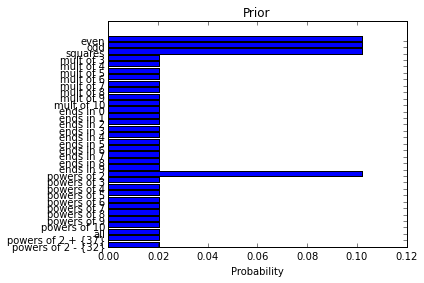

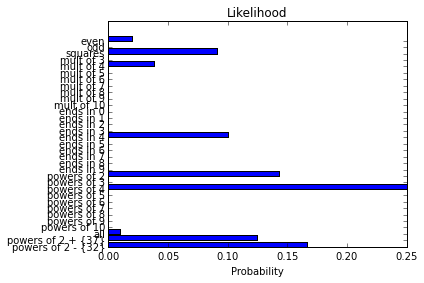

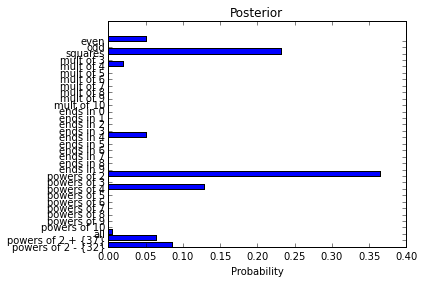

"powers of 2"  is the most likely concept


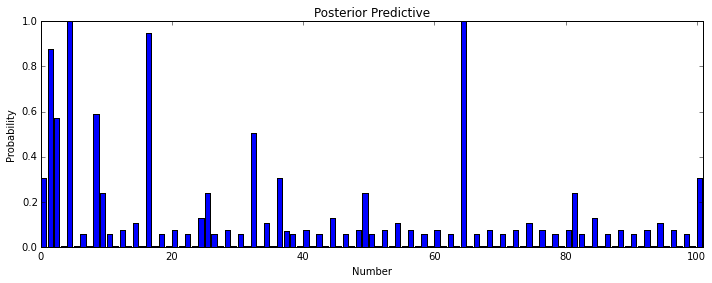

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

'''
Here a concept is some subset of the integers 0-100.
From a set of concepts, the user chooses a concept and inputs
a "random" sampling from that concept. This program then attempts
to predict whcih concept was chosen by the user and gives a predictive
probability that any given number could be in the user's chosen concept.
'''

def init_concepts():
    '''
    Defines the concepts
    returns a dictionary containing all the concepts
    '''
    concept_labels = ["even", "odd", "squares",
                      # indices 3 - 10
                      "mult of 3", "mult of 4", "mult of 5", "mult of 6", 
                      "mult of 7", "mult of 8", "mult of 9", "mult of 10",
                      # indices 11 - 20
                      "ends in 0", "ends in 1", "ends in 2", "ends in 3", 
                      "ends in 4", "ends in 5", "ends in 6", "ends in 7",
                      "ends in 8", "ends in 9",
                      # indices 21 - 29
                      "powers of 2", "powers of 3", "powers of 4", 
                      "powers of 5", "powers of 6", "powers of 7",
                      "powers of 8", "powers of 9", "powers of 10",
                      # indices 30 - 32
                      "all", "powers of 2 + {37}", "powers of 2 - {32}"]

    concepts = {}

    # first few concepts
    concepts["even"] = set(range(0, 101, 2))
    concepts["odd"] = set(range(1, 101, 2))
    concepts["squares"] = set([x**2 for x in xrange(11)])

    # multiples of i
    for i in xrange(3, 11):
        label = concept_labels[i]
        concepts[label] = set([i*x for x in xrange(101 // i + 1)])

    # ends in i
    for i in xrange(10):
        label = concept_labels[i + 11]
        concepts[label] = set([x + i for x in xrange(0, 100, 10)])
    # the loop misses this one case
    concepts["ends in 0"].add(100)

    # powers of i
    for i in xrange(2, 11):
        label = concept_labels[i+19]
        concepts[label] = set([i**x for x in xrange(int(np.log(100)/np.log(i))+1)])

    # last few concepts
    concepts["all"] = set(range(0, 101))
    concepts["powers of 2 + {37}"] = set([1,2,4,8,16,32,64,37])
    concepts["powers of 2 - {32}"] = set([1,2,4,8,16,64])
    
    return concept_labels, concepts

def init_prior(concept_labels):
    '''
    returns a prior distribution on the concepts
    '''
    # init the prior distribution
    prior = np.ones((len(concept_labels), 1))
    
    for i in [0, 1, 2, 21]:
        prior[i] = 5
    prior = prior / np.sum(prior)
    
    return prior

def plot_h_distribution(data, labels, title):
    '''
    plots a horizontal bar graph of the given data with the given labels
    '''
    y_pos = np.arange(len(labels))
    plt.barh(y_pos, data[::-1])
    plt.yticks(y_pos, labels[::-1])
    plt.xlabel("Probability")
    plt.title(title)
    plt.tight_layout()
    plt.show()
    plt.close()

def run():
    '''
    prompts the user for the sampling
    updates the prior distribution
    and gives plots and a prediction of the concept
    '''
    
    # initialize data
    concept_labels, concepts = init_concepts()
    prior = init_prior(concept_labels)

    # prompt user for a set of random samples chosen uniformly over the concept
    data = input('Please input a set of numbers: ')
    try:
        data = [x for x in data]
        n = len(data)
    except:
        data = [data]
        n = 1
    
    # compute the likelihood of each concept given the input set
    likelihood = np.empty((len(concept_labels), 1))
    for i, label in enumerate(concept_labels):
        concept = concepts[label]
        if np.all([d in concept for d in data]):
            likelihood[i] = (1 / len(concept))**n
        else:
            likelihood[i] = 0
    
    # compute the posterior distribution given the prior and the data
    posterior = np.array([prior[i]*likelihood[i] for i in xrange(len(concepts))])
    posterior = posterior / np.sum(posterior)
    
    # plot the distributions on horizontal bar graphs
    plot_h_distribution(prior, concept_labels, "Prior")
    plot_h_distribution(likelihood, concept_labels, "Likelihood")
    plot_h_distribution(posterior, concept_labels, "Posterior")
    
    # find the most likely concept and print it
    index = np.argmax(posterior)
    print '"' + concept_labels[index] + '"', " is the most likely concept"
    
    # compute the posterior predictive distribution
    post_predictive = np.zeros(101)
    for x in xrange(101):
        for i, label in enumerate(concept_labels):
            if x in concepts[label]:
                post_predictive[x] += posterior[i]
    
    # plot the posterior predictive distribution on a vertical bar graph
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(1,1,1)
    ax.bar(range(101), post_predictive)
    ax.set_xlim([0,101])
    ax.set_xlabel("Number")
    ax.set_ylabel("Probability")
    ax.set_title("Posterior Predictive")
    plt.tight_layout()
    plt.show()
    plt.close()        

run()